In [63]:
%matplotlib inline
import pandas as pd

## Load results

In [64]:
series = [
    'masked',
    'masked_no_symbolic',
    'masked_no_symbolic_no_selective',
    'masked_no_selective',
    'masked_symbolic_low_order',
    'unmasked',
    'unmasked_no_symbolic',
    'upfront',
    'upfront_selective',
    'masked_reversed',
    'unmasked_reversed',
]
series_names = series
# series_names = [
#     'Masked',
#     'Unmasked',
#     'Masked R',
#     'Unmasked R',
# ]
total_timess = {
   s: pd.read_csv(f'data/benchmark_{s}.csv')
   for s in series 
}

## Raw results

In [65]:
from ipywidgets import interact

In [66]:
@interact
def _(series=series):
    return total_timess[series]

,Flow*,P,Q,G(P | G(Q)),tentative eval,root detection,composing flowpipe,composing atomic,Total
0,95.233775,4.849681,75.397913,160.705756,0.671075,0.012166,9.024813,69.774369,175.706870
1,86.049723,4.718836,71.392169,152.455355,0.588637,0.011657,8.588581,66.173513,162.414093
2,91.826396,4.374766,69.806679,148.557603,0.650478,0.006228,8.794640,63.926516,166.244472
3,84.388521,4.115988,64.260538,136.962095,0.575871,0.017831,8.125343,58.935361,153.001523
4,85.475731,5.156142,63.595318,137.824658,0.755847,0.015527,9.113725,58.233114,154.517657
5,87.528754,3.949889,50.288589,108.671392,0.558201,0.013558,7.868895,45.168377,141.996034
6,85.555518,4.206048,64.568350,137.790195,0.576347,0.010301,8.303619,58.864074,154.614633
7,87.536134,4.318244,68.272065,145.383758,0.611482,0.006768,8.692222,62.603496,160.367640
8,91.419652,4.679278,61.664583,132.944227,0.596385,0.012715,8.648393,56.448894,158.026862
9,85.953659,4.468596,51.543417,112.277591,0.562647,0.016836,8.324879,46.489693,142.238052


## Comparison

In [67]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})
comparison.columns = series_names
comparison

,masked,masked_no_symbolic,masked_no_symbolic_no_selective,masked_no_selective,masked_symbolic_low_order,unmasked,unmasked_no_symbolic,upfront,upfront_selective,masked_reversed,unmasked_reversed
Flow*,88.487527,89.314221,90.387776,89.519013,90.795448,88.349099,87.351895,86.753117,86.055504,90.754738,89.126531
P,4.516377,8.252677,11.378656,10.375310,4.338874,14.157551,18.473653,101.065321,81.601395,4.472154,14.386582
Q,66.791373,19.505271,23.240980,46.650762,22.870374,231.792244,62.602437,8.015537,6.482997,60.181545,228.252073
G(P | G(Q)),142.849452,55.753620,69.480787,114.291352,54.656278,492.132458,162.368580,218.376952,176.384931,129.530178,485.515028
tentative eval,0.617816,0.627425,0.626419,0.640983,1.788476,3.427245,3.260674,0.000000,0.000000,0.614081,3.357448
root detection,0.011971,1.171394,1.375793,0.006988,0.242922,0.041662,4.533566,5.423032,4.336716,0.011454,0.041800
composing flowpipe,8.586562,25.266893,31.773484,25.268341,9.566841,35.208141,70.864247,96.964471,78.423763,8.589822,34.847313
composing atomic,61.391887,0.005268,0.005661,30.203434,15.162635,205.250053,0.020061,0.014639,0.014287,54.768018,198.988130
Total,160.054875,117.360519,125.276546,146.811437,118.271082,334.563309,168.703507,195.974854,174.303036,155.667343,332.032337


In [68]:
comparison.to_csv("data/comparison.csv")

In [69]:
comparison_stds = pd.DataFrame({
    s: total_times.std()
    for s, total_times in total_timess.items()
})
comparison_stds.columns = series_names
comparison_stds

,masked,masked_no_symbolic,masked_no_symbolic_no_selective,masked_no_selective,masked_symbolic_low_order,unmasked,unmasked_no_symbolic,upfront,upfront_selective,masked_reversed,unmasked_reversed
Flow*,3.447608,3.912963,4.192022,3.347668,5.013069,3.525089,3.029198,3.492298,2.737438,4.604040,2.900533
P,0.291314,0.510462,0.736535,0.306267,0.165227,0.687687,3.218541,5.172467,4.865031,0.313286,0.633897
Q,4.955921,4.572466,6.553863,3.514249,0.960809,17.078722,4.977777,0.435246,0.605738,5.452558,19.662794
G(P | G(Q)),9.927822,9.129469,13.503717,7.038672,2.015133,34.066995,11.425670,10.690019,9.799858,11.319105,39.207650
tentative eval,0.056054,0.044980,0.042822,0.052586,0.082484,0.220555,0.196261,0.000000,0.000000,0.048349,0.196254
root detection,0.004342,0.217711,0.200730,0.003369,0.011251,0.005579,0.321382,0.294563,0.380224,0.003868,0.008456
composing flowpipe,0.334644,4.294341,6.472132,1.282178,0.329555,1.940020,5.165472,4.964340,4.682049,0.545109,1.484524
composing atomic,4.831942,0.000414,0.000433,2.228095,0.674811,15.303850,0.001007,0.000885,0.001393,5.122892,11.276192
Total,6.526644,6.711308,8.716302,4.853467,5.179729,17.732872,6.083639,7.149207,5.472321,8.077597,19.163485


In [70]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose()
comparison2

,P,Q
masked,4.516377,66.791373
masked_no_symbolic,8.252677,19.505271
masked_no_symbolic_no_selective,11.378656,23.240980
masked_no_selective,10.375310,46.650762
masked_symbolic_low_order,4.338874,22.870374
unmasked,14.157551,231.792244
unmasked_no_symbolic,18.473653,62.602437
upfront,101.065321,8.015537
upfront_selective,81.601395,6.482997
masked_reversed,4.472154,60.181545


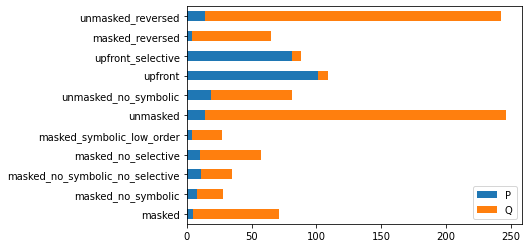

In [71]:
p = comparison2.plot(kind='barh', stacked=True, grid=False)
p

In [72]:
p.get_figure().savefig('images/comparison-analysis7-bar-chart-1.pdf')

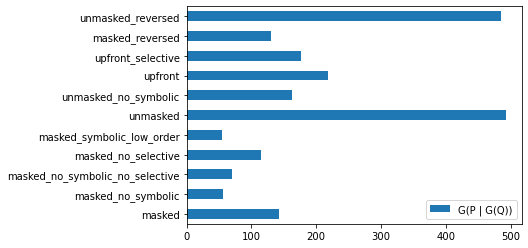

In [74]:
comparison3 = comparison.loc[['G(P | G(Q))'],:].transpose()
comparison3.plot(kind='barh')

In [75]:
comparison5 = comparison.loc[['composing flowpipe'],:].transpose()
comparison5

,composing flowpipe
masked,8.586562
masked_no_symbolic,25.266893
masked_no_symbolic_no_selective,31.773484
masked_no_selective,25.268341
masked_symbolic_low_order,9.566841
unmasked,35.208141
unmasked_no_symbolic,70.864247
upfront,96.964471
upfront_selective,78.423763
masked_reversed,8.589822


In [76]:
comparison4 = comparison.loc[['Flow*', 'P', 'Q'],:].transpose()
comparison4

,Flow*,P,Q
masked,88.487527,4.516377,66.791373
masked_no_symbolic,89.314221,8.252677,19.505271
masked_no_symbolic_no_selective,90.387776,11.378656,23.240980
masked_no_selective,89.519013,10.375310,46.650762
masked_symbolic_low_order,90.795448,4.338874,22.870374
unmasked,88.349099,14.157551,231.792244
unmasked_no_symbolic,87.351895,18.473653,62.602437
upfront,86.753117,101.065321,8.015537
upfront_selective,86.055504,81.601395,6.482997
masked_reversed,90.754738,4.472154,60.181545


In [77]:
comparison.loc[['composing flowpipe'], ['upfront', 'upfront_selective']].transpose()

,composing flowpipe
upfront,96.964471
upfront_selective,78.423763


In [78]:
comparison6 = comparison4.join(comparison.loc[['composing flowpipe'], ['upfront', 'upfront_selective']].transpose(), how='outer')
comparison6['composing flowpipe'].fillna(0, inplace=True)
comparison6

,Flow*,P,Q,composing flowpipe
masked,88.487527,4.516377,66.791373,0.000000
masked_no_selective,89.519013,10.375310,46.650762,0.000000
masked_no_symbolic,89.314221,8.252677,19.505271,0.000000
masked_no_symbolic_no_selective,90.387776,11.378656,23.240980,0.000000
masked_reversed,90.754738,4.472154,60.181545,0.000000
masked_symbolic_low_order,90.795448,4.338874,22.870374,0.000000
unmasked,88.349099,14.157551,231.792244,0.000000
unmasked_no_symbolic,87.351895,18.473653,62.602437,0.000000
unmasked_reversed,89.126531,14.386582,228.252073,0.000000
upfront,86.753117,101.065321,8.015537,96.964471


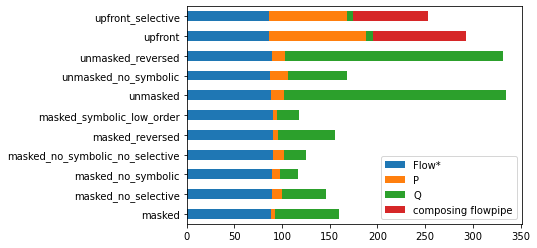

In [79]:
p = comparison6.plot(kind='barh', stacked=True, grid=False)
p

In [80]:
p.get_figure().savefig('images/comparison-analysis7-bar-chart-2.pdf')

In [85]:
comparison5 = comparison6.copy()

In [97]:
comparison.loc[['Flow*', 'G(P | G(Q))'], :].transpose()

,Flow*,G(P | G(Q))
masked,88.487527,142.849452
masked_no_symbolic,89.314221,55.753620
masked_no_symbolic_no_selective,90.387776,69.480787
masked_no_selective,89.519013,114.291352
masked_symbolic_low_order,90.795448,54.656278
unmasked,88.349099,492.132458
unmasked_no_symbolic,87.351895,162.368580
upfront,86.753117,218.376952
upfront_selective,86.055504,176.384931
masked_reversed,90.754738,129.530178


In [98]:
rem = comparison.loc[['Flow*', 'G(P | G(Q))'], :].transpose().sum(axis=1) - comparison6.sum(axis=1)
rem

masked                              71.282103
masked_no_selective                 56.998928
masked_no_symbolic                  27.707322
masked_no_symbolic_no_selective     34.592018
masked_reversed                     64.617573
masked_symbolic_low_order           27.180645
unmasked                           245.918248
unmasked_no_symbolic                81.016968
unmasked_reversed                  242.609222
upfront                            109.155216
upfront_selective                   88.137399
dtype: float64

In [88]:
comparison6.loc[:,'Remainder'] = rem

In [89]:
comparison6

,Flow*,P,Q,composing flowpipe,Remainder
masked,88.487527,4.516377,66.791373,0.000000,0.259599
masked_no_selective,89.519013,10.375310,46.650762,0.000000,0.266351
masked_no_symbolic,89.314221,8.252677,19.505271,0.000000,0.288350
masked_no_symbolic_no_selective,90.387776,11.378656,23.240980,0.000000,0.269133
masked_reversed,90.754738,4.472154,60.181545,0.000000,0.258906
masked_symbolic_low_order,90.795448,4.338874,22.870374,0.000000,0.266385
unmasked,88.349099,14.157551,231.792244,0.000000,0.264415
unmasked_no_symbolic,87.351895,18.473653,62.602437,0.000000,0.275522
unmasked_reversed,89.126531,14.386582,228.252073,0.000000,0.267151
upfront,86.753117,101.065321,8.015537,96.964471,-96.823592


In [19]:
comparison5.to_csv("data/comparison-remainder-analysis7.csv")

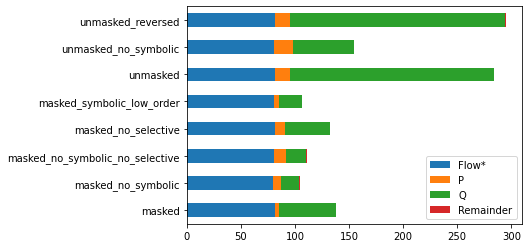

In [20]:
comparison5.plot(kind='barh', stacked=True, grid=False)

In [21]:
_.get_figure().savefig(
    'images/key-comparison-analysis7-bar-chart.pdf')

In [22]:
comparison6 = comparison.loc[['Flow*', 'P', 'Q', 'Total'], :].transpose()

In [23]:
comparison6

,Flow*,P,Q,Total
masked,81.213639,4.205520,52.319785,137.992423
masked_no_symbolic,80.129386,7.359039,16.465557,104.230733
masked_no_symbolic_no_selective,80.541870,11.364032,18.692839,110.861127
masked_no_selective,81.520876,9.580814,41.018942,132.382802
masked_symbolic_low_order,81.078617,4.129417,20.856542,106.321356
unmasked,81.510925,13.780688,188.273943,283.828217
unmasked_no_symbolic,80.460656,17.674069,56.042079,154.448045
unmasked_reversed,81.416929,13.595848,199.301698,294.571474


In [24]:
comparison6.to_csv('data/key-comparison-analysis-7.csv')

In [25]:
comparison3.loc['unmasked',:] / comparison3.loc['masked',:]

P | F(Q)    3.569479
dtype: float64

In [26]:
comparison3.loc['unmasked_no_symbolic',:] / comparison3.loc['masked_no_symbolic',:]

P | F(Q)    3.083964
dtype: float64

In [27]:
comparison3.loc['masked',:] / comparison3.loc['masked_no_symbolic',:]

P | F(Q)    2.366041
dtype: float64

In [28]:
comparison3.loc['unmasked',:] / comparison3.loc['unmasked_no_symbolic',:]

P | F(Q)    2.738532
dtype: float64

In [29]:
comparison3.loc['masked_symbolic_low_order',:] / comparison3.loc['masked_no_symbolic',:]

P | F(Q)    1.048625
dtype: float64